# Exercise Sheet 01: Data preprocessing, visualization, correlation, statistical testing, and modeling

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2023-10-23**  
**Exercise Sheet Submission Deadline: 2023-11-03, noon (i.e. 12:00), via git or e-mail to aderiyeva@techfak.uni-bielefeld.de**

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

**AUTHORS**

Florian Wicher, Christopher Gerz, Torben Lambrecht, Bastian Hunecke

## Preamble: Data set

In this exercise sheet, we investigate first data exploration activities that can be performed on typical, tabular data sets, up to simple statistical testing.

The file `sheet01_data.csv` contains fictional data as might be produced in an educational study. Each row represents a student participating in the study. The first column is just the student index, the second column indicates the experimental condition the student was in (`0` for control group, `1` for intervention group). The third column is the student's test result on a pre-test, the fourth column is the student's test result on a post-test.

The following line loads this raw data and prints it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
X = np.loadtxt('sheet01_data.csv', skiprows = 1, delimiter = '\t')
X

array([[  0.,   0.,  27.,  40.],
       [  1.,   0.,  31.,  34.],
       [  2.,   0.,  30.,  nan],
       [  3.,   0.,  20.,  nan],
       [  4.,   0.,  41.,  54.],
       [  5.,   0.,  39.,  51.],
       [  6.,   0.,  20.,  33.],
       [  7.,   0.,  27.,  36.],
       [  8.,   0.,  79.,  83.],
       [  9.,   0.,  33.,  46.],
       [ 10.,   0.,  22.,  29.],
       [ 11.,   0.,  22.,  41.],
       [ 12.,   0.,  29.,  nan],
       [ 13.,   0.,  25.,  nan],
       [ 14.,   0.,  41.,  47.],
       [ 15.,   0.,  23.,  36.],
       [ 16.,   0.,  17.,  30.],
       [ 17.,   0.,  93., 100.],
       [ 18.,   0.,  34.,  40.],
       [ 19.,   0.,  23.,  27.],
       [ 20.,   0.,  48.,  53.],
       [ 21.,   0.,  19.,  26.],
       [ 22.,   0.,  28.,  33.],
       [ 23.,   0.,  38.,  46.],
       [ 24.,   0.,  22.,  34.],
       [ 25.,   0.,  34.,  45.],
       [ 26.,   0.,  36.,  49.],
       [ 27.,   0.,  33.,  47.],
       [ 28.,   0.,  40.,  41.],
       [ 29.,   0.,  39.,  52.],
       [ 3

### Task 01.01

Write python code to automatically identify outliers, which are defined as any students with a pre-test score higher than 3 standard deviations above the mean. Write python code that removes these outliers from the data set.

In [4]:
pre_test_mean = np.mean(X, axis=0)[2]
std_dev = np.std(X, axis=0)[2]

outlier = pre_test_mean+(3*std_dev)
print("The outliers are:")
idx = []
for i in X:
    if i[2] > outlier:
        idx.append(int(i[0]))
        print(i)
idx =  sorted(idx, reverse=True)
print("\n")
new_X = np.delete(X, idx,0)
print("The dataset without the outliers:\n", new_X)
 


The outliers are:
[ 8.  0. 79. 83.]
[ 17.   0.  93. 100.]
[ 42.   1.  85. 100.]


The dataset without the outliers:
 [[ 0.  0. 27. 40.]
 [ 1.  0. 31. 34.]
 [ 2.  0. 30. nan]
 [ 3.  0. 20. nan]
 [ 4.  0. 41. 54.]
 [ 5.  0. 39. 51.]
 [ 6.  0. 20. 33.]
 [ 7.  0. 27. 36.]
 [ 9.  0. 33. 46.]
 [10.  0. 22. 29.]
 [11.  0. 22. 41.]
 [12.  0. 29. nan]
 [13.  0. 25. nan]
 [14.  0. 41. 47.]
 [15.  0. 23. 36.]
 [16.  0. 17. 30.]
 [18.  0. 34. 40.]
 [19.  0. 23. 27.]
 [20.  0. 48. 53.]
 [21.  0. 19. 26.]
 [22.  0. 28. 33.]
 [23.  0. 38. 46.]
 [24.  0. 22. 34.]
 [25.  0. 34. 45.]
 [26.  0. 36. 49.]
 [27.  0. 33. 47.]
 [28.  0. 40. 41.]
 [29.  0. 39. 52.]
 [30.  1. 24. 50.]
 [31.  1. 38. 62.]
 [32.  1. 34. 51.]
 [33.  1. 37. nan]
 [34.  1. 31. 44.]
 [35.  1. 37. 57.]
 [36.  1. 25. 50.]
 [37.  1. 23. 37.]
 [38.  1. 12. 38.]
 [39.  1. 31. 56.]
 [40.  1. 36. 46.]
 [41.  1. 34. 48.]
 [43.  1. 41. 59.]
 [44.  1. 14. 37.]
 [45.  1.  7. 29.]
 [46.  1. 30. 54.]
 [47.  1. 42. 62.]
 [48.  1. 25. 44.]
 [49.  1.

Print how many points are left in the control group and the intervention group after outlier removal

In [5]:
control_count = 0
intervention_count = 0

for i in new_X:
    if (i[1] == 0):
        control_count = control_count+1
    else:
        intervention_count = intervention_count+1

print("number of points in control group:", control_count)
print("number of points in intervention group:", intervention_count)

number of points in control group: 28
number of points in intervention group: 29


### Task 01.02

Write python code to compute the mean pre- and post-test score, as well as the respective standard deviation, of the control group and the intervention group. Be aware of nan values. Print the results.

In [6]:
control_group = []
intervention_group = []

for i in new_X:
    if i[1] == 0:
        control_group.append(i)
    else:
        intervention_group.append(i)

pre_control_mean = np.mean(control_group, axis=0)[2]
post_control_mean = np.nanmean(control_group, axis=0)[3]
pre_intervention_mean = np.mean(intervention_group, axis=0)[2]
post_intervention_mean = np.nanmean(intervention_group, axis=0)[3]

pre_control_std = np.std(control_group, axis=0)[2]
post_control_std = np.nanstd(control_group, axis=0)[3]
pre_intervention_std = np.std(intervention_group, axis=0)[2]
post_intervention_std = np.nanstd(intervention_group, axis=0)[3]


print("mean of pre-test score of the control group:", pre_control_mean)
print("mean of post-test score of the control group:", post_control_mean, "\n")

print("standard deviation of pre-test score of the control group:", pre_control_std)
print("standard deviation of post-test score of the control group:", post_control_std, "\n")


print("mean of pre-test score of the intervention group:", pre_intervention_mean)
print("mean of post-test score of the intervention group:", post_intervention_mean, "\n")

print("standard deviation of pre-test score of the intervention group:", pre_intervention_std)
print("standard deviation of post-test score of the intervention group:", post_intervention_std)


mean of pre-test score of the control group: 30.035714285714285
mean of post-test score of the control group: 40.416666666666664 

standard deviation of pre-test score of the control group: 8.033332980495095
standard deviation of post-test score of the control group: 8.396014266040497 

mean of pre-test score of the intervention group: 30.20689655172414
mean of post-test score of the intervention group: 50.11538461538461 

standard deviation of pre-test score of the intervention group: 9.147750092122058
standard deviation of post-test score of the intervention group: 9.069504791319277


### Task 01.03

Write python code to impute the missing values (that means: nan values) in the post test scores by the mean of the data. HOWEVER, the imputation should be done separately for the control and the intervention group.

In [7]:
# Imputation by using the mean of the post-test score for each group

control_group = []
intervention_group = []

for i in new_X:
    if i[1] == 0:
        control_group.append(i)
    else:
        intervention_group.append(i)

control_group_mean = np.nanmean(control_group, axis=0)[3]
intervention_group_mean = np.nanmean(intervention_group, axis=0)[3]

for i in new_X:
    if np.isnan(i[3]):
        if i[1] == 0:
            i[3] = control_group_mean
        else:
            i[3] = intervention_group_mean

print(new_X)

[[ 0.          0.         27.         40.        ]
 [ 1.          0.         31.         34.        ]
 [ 2.          0.         30.         40.41666667]
 [ 3.          0.         20.         40.41666667]
 [ 4.          0.         41.         54.        ]
 [ 5.          0.         39.         51.        ]
 [ 6.          0.         20.         33.        ]
 [ 7.          0.         27.         36.        ]
 [ 9.          0.         33.         46.        ]
 [10.          0.         22.         29.        ]
 [11.          0.         22.         41.        ]
 [12.          0.         29.         40.41666667]
 [13.          0.         25.         40.41666667]
 [14.          0.         41.         47.        ]
 [15.          0.         23.         36.        ]
 [16.          0.         17.         30.        ]
 [18.          0.         34.         40.        ]
 [19.          0.         23.         27.        ]
 [20.          0.         48.         53.        ]
 [21.          0.         19.  

## Data Visualization

### Task 01.04

Display two scatter plots (via `matplotlib.pyplot.scatter`), one for the control group and one for the intervention group, with pre-test score on the x-axis and post-test score on the y-axis. Label the axis and give the plots titles. Interpret these plot: Do you believe that pre- and post-test score correlate?

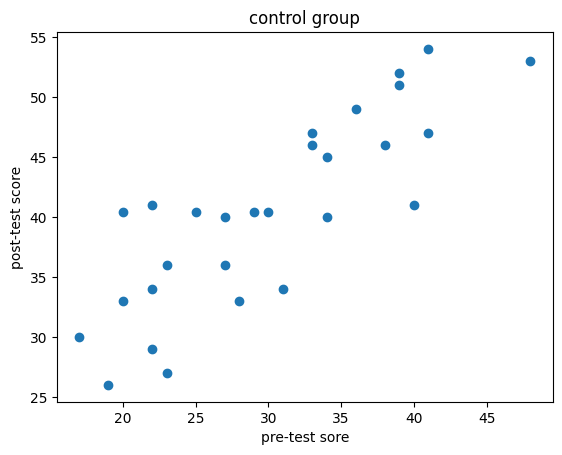

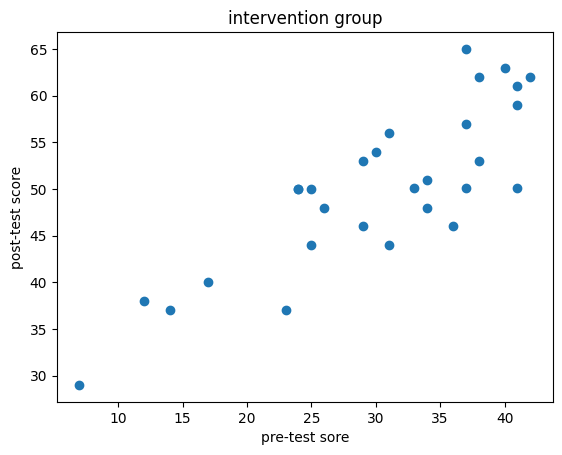

In [8]:
control_group_pre = []
control_group_post = []
intervention_group_pre = []
intervention_group_post = []

for i in new_X:
    if i[1] == 0:
        control_group_pre.append(i[2])
        control_group_post.append(i[3])
    else:
        intervention_group_pre.append(i[2])
        intervention_group_post.append(i[3])

plt.scatter(control_group_pre, control_group_post)
plt.title("control group")
plt.xlabel("pre-test sore")
plt.ylabel("post-test score")
plt.show()

plt.scatter(intervention_group_pre, intervention_group_post)
plt.title("intervention group")
plt.xlabel("pre-test sore")
plt.ylabel("post-test score")
plt.show()


Yes we think that the pre-test score and post-test score correlate because in the plot we can see that a higher pre-test score usually indicates a higher post-test score.

### Task 01.05

Display a bar plot with four bars (with error bars): pre-test mean (and standard error) for control and intervention group; and post-test mean (with standard error) for control and intervention group. Label the axes. Interpret this plot: Where are significant differences, do you think? What is your explanation for these differences?

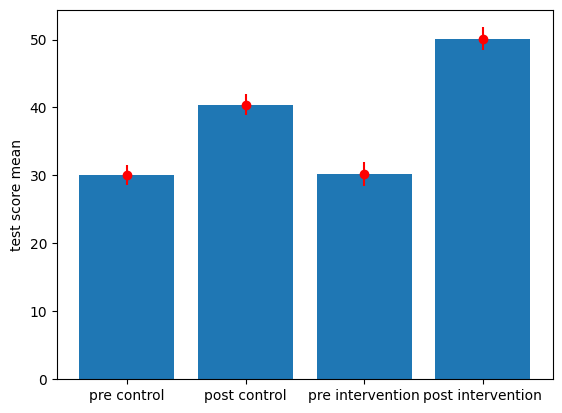

In [9]:
x = np.array(["pre control", "post control", "pre intervention", "post intervention"])
means = np.array([pre_control_mean, post_control_mean, pre_intervention_mean, post_intervention_mean])

pre_control_error = pre_control_std / np.sqrt(control_count)
post_control_error = post_control_std / np.sqrt(control_count)
pre_intervention_error = pre_intervention_std / np.sqrt(intervention_count)
post_intervention_error = post_intervention_std / np.sqrt(intervention_count)

error = np.array([pre_control_error, post_control_error, pre_intervention_error, post_intervention_error])

plt.bar(x, means)
plt.ylabel("test score mean")
plt.errorbar(x, means, yerr=error, fmt="o", color="r")

plt.show()

The siginifcant differences are between the post control group and the post intervention group. The pre control and pre intervention group are similar because they have not learned
anything yet and thus score very similar on the test. Since the post intervention group scores higher than the post control group, we can assume that the intervention group
learned more with their method.


### Task 01.06

Display a bar plot with two bars (with error bars): the difference between post- and pre-test score for the control group (with standard error) and for the intervention group (with standard error). Label the axes. Interpret this plot: Do you think the difference of post- and pre-test scores significantly differs between control and intervention group?

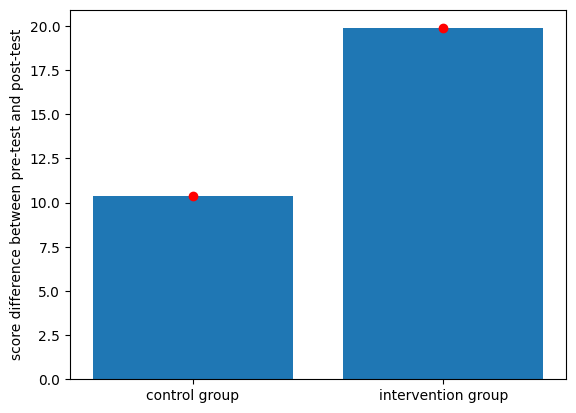

In [9]:
x_axis = np.array(["control group", "intervention group"])
difference = np.array([post_control_mean - pre_control_mean, post_intervention_mean - pre_intervention_mean])

error = np.array([abs(post_control_error - pre_control_error), abs(post_intervention_error - pre_intervention_error)])

plt.bar(x_axis, difference)
plt.ylabel("score difference between pre-test and post-test")
plt.errorbar(x_axis, difference, yerr=error, fmt="o", color="r")
plt.show()

Yes the difference between control and intervention group differs significantly. In the plot we can see that the intervention group scored higher in the test than the control group compared to their previous test scorea.

### Task 01.07 (Bonus task)

Display a box plot with four boxes: pre-test results in the control and intervention group, and post-test results in the control and intervention group. Label the axes.

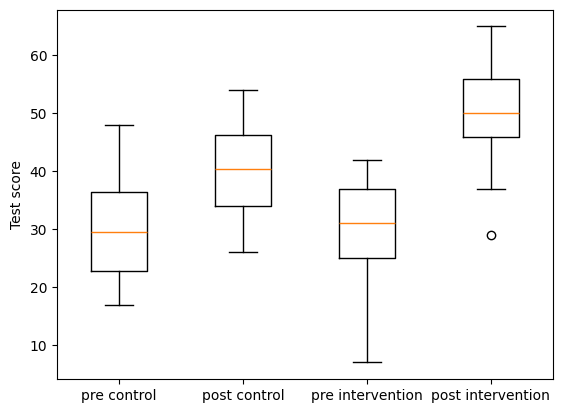

In [29]:
pre_intervention_values = new_X[new_X[:,1] == 1][:,2]
pre_control_values = new_X[new_X[:,1] == 0][:,2]
post_intervention_values = new_X[new_X[:,1] == 1][:,3]
post_control_values = new_X[new_X[:,1] == 0][:,3]

all_values = [pre_control_values, post_control_values, pre_intervention_values, post_intervention_values]

plt.boxplot(all_values)

plt.xticks([1,2,3,4], ["pre control", "post control", "pre intervention", "post intervention"])
plt.ylabel("Test score")
plt.show()

### Task 01.08 (Bonus Task)

Display a box plot with two boxes: difference between post-test and pre-test scores for the control group and the intervention group.

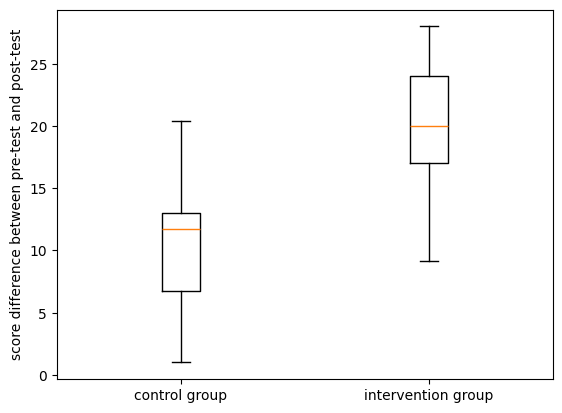

In [30]:
control_diff = []
intervention_diff = []

for i in range(len(pre_control_values)):
    control_diff.append(post_control_values[i] - pre_control_values[i])

for i in range(len(pre_intervention_values)):
    intervention_diff.append(post_intervention_values[i] - pre_intervention_values[i])
    
differences = [control_diff, intervention_diff]
plt.boxplot(differences)

plt.xticks([1,2], ["control group", "intervention group"])
plt.ylabel("score difference between pre-test and post-test")
plt.show()

## Statistical Testing

### Task 01.09

Write a python function to compute the Pearson correlation between two arrays of the same size.

In [12]:
array_a = np.random.rand(5)
array_b = np.random.rand(5)

matrix_a = np.random.rand(5,2)
matrix_b = np.random.rand(5,2)


#wikipedia def
def pearson_corr_a(a,b):
    return np.divide((np.cov(a,b)), (np.multiply(np.var(a), np.var(b))))

#vl def
def linear_correlation_coeff(x,y):
    x = np.array(x)
    y = np.array(y)
    
    m = x.size
    
    r = 0
    
    mu_x = np.mean(x)
    mu_y = np.mean(y)
    
    sigma_x = np.std(x)
    sigma_y = np.std(y)
    
    for i in range(m):
        r += ((x[i] - mu_x) / sigma_x) * ((y[i] - mu_y) / sigma_y)
        
    return r / m

#for testing
linear_correlation_coeff(array_a, array_b)

0.43250840851181904

In [13]:
data = new_X


### Task 01.10

Use your function to compute the Pearson correlation between pre-test and post-test scores for both control and intervention condition and print the scores.

Interpret the strength of the correlation using the following rule of thumb from [Mukaka (2012)](https://www.ajol.info/index.php/mmj/article/download/81576/71739):

* A correlation of $0.3 < |r| \leq 0.5$ is considered small.
* A correlation of $0.5 < |r| \leq 0.7$ is considered moderate.
* A correlation of $0.7 < |r| \leq 0.9$ is considered high.
* A correlation of $0.9 < |r| \leq 1.0$ is considered very high.

In [14]:
pre_test = [i[2] for i in data]
post_test = [i[3] for i in data]

r =  np.abs(linear_correlation_coeff(pre_test, post_test))
print("R: ", r)

if r > 0.3 and r <= 0.5:
    print("Small correlation")
elif r > 0.5 and r <= 0.7:
    print("Moderate correlation")
elif r > 0.7 and r <= 0.9:
    print("High correlation")
elif r > 0.9 and r <= 1.0:
    print("Very High correlation")
    

R:  0.7243706318977319
High correlation


Validate your scores by computing the Pearson correlation again with `scipy.stats.pearsonr`. Print both `r` and the `p` value returned by the function for both the control and the intervention condition. Are the correlations statistically significant at $0.01$ level?

In [45]:
from scipy import stats
stats = stats.pearsonr(pre_test, post_test)

print("r = ", stats[0])
print("p = ", stats[1])

r =  0.7243706318977322
p =  1.9030973527825513e-10


### Task 01.11

Write a python function that performs a Welch $t$-test. In particular, your function should:
1. compute the number of data points, the mean, and the standard deviation of both samples (use the `ddof = 1` parameter for the `np.std` function).
2. compute the pooled standard deviation as
\begin{equation}
\sigma_\text{pooled} = \sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}
\end{equation}
  where $n_x$ and $n_y$ are the number of data points in the two samples and $\sigma_x$ and $\sigma_y$ are the respective standard deviations.
3. compute the $t$-statistic as 
\begin{equation}
t = -\Big|\frac{\mu_x - \mu_y}{\sigma_\text{pooled}}\Big|
\end{equation}
  where $\mu_x$ and $\mu_y$ are the means of the two samples.
4. compute the number of degree of freedom via the Welch-Satterthwaite equation, meaning:
\begin{equation}
\text{df} = \frac{\sigma_\text{pooled}^4}{\frac{\sigma_x^4}{n_x^2\cdot(n_x - 1)} + \frac{\sigma_y^4}{n_y^2\cdot(n_y - 1)}}
\end{equation}
5. compute $p$ as twice the probability of any $t$ value equal or smaller to your value using the `cdf` function of `scipy.stats.t` with the number of freedoms as computed in the previous step.

Your function should return both $t$ and $p$.

In [51]:
from scipy.stats import t

def compute_pooled_std(x,y):
    
    #compute size of arrays and std
    size_x = x.size
    size_y = y.size
    
    std_x = np.std(x, ddof = 1)
    std_y = np.std(y, ddof = 1)
    
    op_a = np.square(std_x) / size_x
    op_b = np.square(std_y) / size_y
    
    return np.sqrt((op_a+op_b))

def compute_t(x,y):
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    pooled_std = compute_pooled_std(x,y)
    
    t = -np.abs( ( (mean_x - mean_y) / pooled_std))
    
    return t

def compute_df(x,y):
    
    pooled_std = compute_pooled_std(x,y)
    
    std_x_4 = np.std(x, ddof = 1)**4
    std_y_4 = np.std(y, ddof = 1)**4
    
    size_x = x.size
    size_y = y.size
    
    op_a = std_x_4 / (size_x**2 * (size_x-1))
    op_b = std_y_4 / (size_y**2 * (size_y-1))
    
    df =  (pooled_std ** 4) / (op_a + op_b)
    
    return df


def compute_p_t(x,y):
    
    t_v = compute_t(x,y)
    df = compute_df(x,y)
    p = t.cdf(t_v, df)
    
    return (t_v, p*2)

In [50]:
a = np.random.rand(5)
b = np.random.rand(5)

t,p = compute_p_t(a,b)

#validation

val_result = scipy.stats.ttest_ind(a,b, equal_var=False)

print("Correct t = ", val_result[0])
print("Correct p = ", val_result[1])

AttributeError: 'numpy.float64' object has no attribute 'cdf'

### Task 01.12

Write python code to perform the following Welch tests (using your function):
1. the pre-test scores in the control versus the intervention condition
2. the post-test scores in the control versus the intervention condition
3. the differences between post- and pre-test scores in the control versus the intervention condition

For each of the tests, print the $t$ and $p$.

Which of the test results are significant at a $0.01$-level?

**Hint:** You can validate that your function returns the correct $t$ and $p$ values by comparing to the output of the function `scipy.stats.ttest_ind` with `equal_var = False`.

In [52]:
# pre-test scores
pre_intervention_scores = new_X[new_X[:,1] == 1][:,2]
pre_control_scores = new_X[new_X[:,1] == 0][:,2]

pre_t, pre_p = compute_p_t(pre_intervention_scores, pre_control_scores)
print("1. pre-test scores:")
print("t =", pre_t, "\np =", pre_p)
print("Validation:", scipy.stats.ttest_ind(pre_intervention_scores, pre_control_scores, equal_var=False))


# post-test scores

post_intervention_scores = new_X[new_X[:,1] == 1][:,3]
post_control_scores = new_X[new_X[:,1] == 0][:,3]

post_t, post_p = compute_p_t(post_intervention_scores, post_control_scores)
print("\n2. post-test scores:")
print("t =", post_t, "\np =", post_p)
print("Validation:", scipy.stats.ttest_ind(post_intervention_scores, post_control_scores, equal_var=False))


# difference scores

diff_intervention_scores = post_intervention_scores - pre_intervention_scores
diff_control_scores = post_control_scores - pre_control_scores

diff_t, diff_p = compute_p_t(diff_intervention_scores, diff_control_scores)
print("\n3. difference scores:")
print("t =", diff_t, "\np =", diff_p)
print("Validation:", scipy.stats.ttest_ind(diff_intervention_scores, diff_control_scores, equal_var=False))

1. pre-test scores:
t = -0.0738102614136434 
p = 0.9414314685841807
Validation: TtestResult(statistic=0.0738102614136434, pvalue=0.9414314685841807, df=54.527421797824225)

2. post-test scores:
t = -4.394148531508487 
p = 5.145756436833774e-05
Validation: TtestResult(statistic=4.394148531508488, pvalue=5.1457564368337666e-05, df=54.78187033204103)

3. difference scores:
t = -7.318306245054616 
p = 1.1642080318417869e-09
Validation: TtestResult(statistic=7.318306245054616, pvalue=1.1642080318417908e-09, df=54.741087555720334)


The tests 2 and 3 are significant at a 0.01-level since $p < 0.01$.

### Task 01.13

Compute the effect sizes for the difference in post-test minus pre-test score between control and intervention condition using the formula

\begin{equation}
d = \frac{|\mu_x - \mu_y|}{\sqrt{\frac{1}{2}(\sigma_x^2 + \sigma_y^2)}}
\end{equation}

where $\mu_x$ and $\mu_y$ are the mean score difference in intervention and control condition and $\sigma_x$ and $\sigma_y$ are the respective standard deviations.

Print the effect size and interpret the size of the effect using the following rule of thumb (by [Sawilowsky (2009)](https://digitalcommons.wayne.edu/cgi/viewcontent.cgi?article=1536&context=jmasm))
* An effect of size $0.01 < d \leq 0.2$ is considered very small.
* An effect of size $0.2 < d \leq 0.5$ is considered small.
* An effect of size $0.5 < d \leq 0.8$ is considered moderate.
* An effect of size $0.8 < d \leq 1.2$ is considered large.
* An effect of size $1.2 < d \leq 2.0$ is considered very large.
* An effect of size $d > 2.0$ is considered huge.

In [19]:
def compute_effect_size(x,y):
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    return np.abs(mean_x - mean_y) / np.sqrt((np.std(x)**2 + np.std(y)**2) / 2)

In [20]:
d = compute_effect_size(diff_control_scores, diff_intervention_scores)
print("Effect size:", d)

NameError: name 'diff_control_scores' is not defined

As the effect size $d$ is in the range of $1.2 < d \leq 2.0$, it is considered very large.

### Task 01.14 (Bonus Task)

Write python code that uses the wilcoxon sign rank test (via `scipy.stats.wilcoxon`) to check whether the post-test scores in the control condition are significantly different from the pre-test scores. Repeat the same analysis for the intervention condition.

## Probabilistic Modeling

Let's assume that a student does a test in which they can achieve a certain number of points in the real numbers. Further, assume that the number of points achieved is generated from a Gaussian distribution with standard deviation $\sigma$. However, the mean of the distribution depends on whether the student has understood the topic or not.

### Task 01.15

Formalize this scenario. In particular:
1. Model a random variable $Z$ that indicates whether the student understood the topic or not. What is the domain? What is the probability mass function $p_Z$? What are the parameters of this function?
2. Model a random variable $X$ for the number of points the student achieves on the test. What is the conditional probability density function $p_{X|Z}$? What are the parameters of this function?

**ANSWER**

$Z$ is a random variable representing whether the student understood the topic or not. The domain is $\{0, 1\}$, where $0$ means that the student did not understand the topic and $1$ means that the student understood the topic.

The probability mass function $p_Z$ is given by $p_Z(0) = \theta$ and $p_Z(1) = 1-\theta$. The parameter $\theta$ is the probability that the student understood the topic.

$X$ is a random variable representing the number of points the student achieves on the test. The conditional probability density function $p_{X|Z}$ is characterized as follows:

* If $Z = 0$: $X$ follows a Gaussian distribution with mean $\mu_0$ and standard deviation $\sigma$.
* If $Z = 1$: $X$ follows a Gaussian distribution with mean $\mu_1$ and standard deviation $\sigma$.

So the number of points $X$ depends on the understanding of the topic $Z$. If the student understands ($Z=1$), they tend to perform better with a mean score of $\mu_1$. If the student does not understand ($Z=0$), they typically achieve a lower score with a mean score of $\mu_0$. The standard deviation $\sigma$ remains the same in both cases.

### Task 01.16

Using Bayes' theorem and the law of total probability, compute the conditional probability mass $p_{Z|X}(1|x)$ for the student having understood the topic given their achieved number of points.

**ANSWER**

### Task 01.17

Assume that the numbers $x_1, \ldots, x_m \in \mathbb{R}$ are generated (independently) from a Gaussian with mean $\mu$ and standard deviation $\sigma$.

1. What is the negative log likelihood of the data under this assumption?
2. Prove that $\mu$ and $\sigma^2$ which minimize the negative log likelihood are exactly $\mu = \frac{1}{m} \sum_{i=1}^m x_i$ and $\sigma^2 = \frac{1}{m} \sum_{i=1}^m (x_i - \mu)^2$. You may assume that the negative log likelihood is convex, in this case.

**ANSWER**